In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
%matplotlib inline
from sklearn import ensemble
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


http://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [5]:
df.tail()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [7]:
df1 = df.drop('Unnamed: 0', axis = 1)

In [8]:
df2 = df1.copy()
scaler = StandardScaler().fit_transform(df2)

In [32]:
pca = PCA(n_components=5).fit_transform(scaler)
pca

array([[-57.44698695,  95.41098079,  74.30154329, -12.16678116,
          7.98183592],
       [-16.91943004,   0.73247037, -64.07289952,  -2.09530764,
        -25.42643128],
       [-70.34521789, -19.30332659,  20.48824048,  48.10289408,
         24.43776306],
       ...,
       [ -4.13308968,  15.69001394, -22.64445342, -11.98242482,
        -57.83577445],
       [-30.81475746,  33.52642256,  70.56563582,  16.64365646,
        -16.57997543],
       [-22.34455668,   4.05235632,  32.32787572,   5.20113434,
        -24.12091183]])

In [33]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=5, random_state=123)
# Fit model
%timeit kmeans_cluster.fit(pca)
cluster_kmeans = kmeans_cluster.predict(pca)

64.6 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
print("The silhoutte score of the KmeansPCA Clustering solution: {}"
      .format(metrics.silhouette_score(pca, cluster_kmeans, metric='euclidean')))

The silhoutte score of the KmeansPCA Clustering solution: 0.4146097724258754


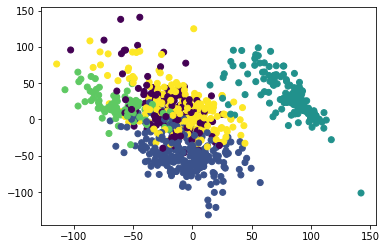

In [35]:
# Plot the solution.
plt.scatter(pca[:,0], pca[:,1], c=cluster_kmeans)
plt.show()

In [42]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaler)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 801 samples in 1.382s...
[t-SNE] Computed neighbors for 801 samples in 23.527s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 40.194143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.348824
[t-SNE] KL divergence after 300 iterations: 3.071643


In [39]:
# Defining the k-means
kmeans_clustert = KMeans(n_clusters=5, random_state=123)
# Fit model
%timeit kmeans_clustert.fit(tsne_results)
cluster_kmeanst = kmeans_clustert.predict(tsne_results)
print("The silhoutte score of the KMeans Tsne Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, cluster_kmeanst, metric='euclidean')))

74.1 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The silhoutte score of the KMeans Tsne Clustering solution: 0.795464277267456


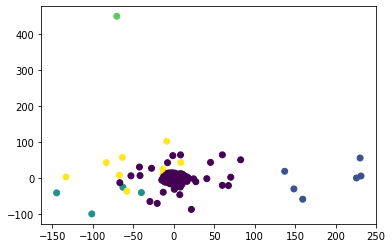

In [40]:
# Plot the solution.
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=cluster_kmeanst)
plt.show()

In [47]:
import umap
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.3,
                      metric='correlation').fit_transform(scaler)
# Defining the k-means
kmeans_clusteru = KMeans(n_clusters=5, random_state=123)
# Fit model
kmeans_clusteru.fit(umap_results)
cluster_kmeansu = kmeans_clusteru.predict(umap_results)
print("The silhoutte score of the KMeans Umap Clustering solution: {}"
      .format(metrics.silhouette_score(umap_results, cluster_kmeansu, metric='euclidean')))

The silhoutte score of the KMeans Umap Clustering solution: 0.8075167536735535


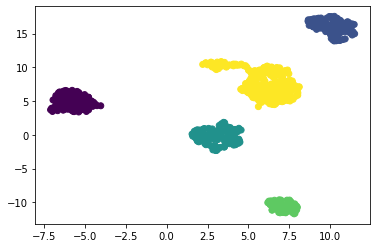

In [46]:
# Plot the solution.
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_kmeansu)
plt.show()

In [67]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
agg_clusters = agg_cluster.fit_predict(pca)
print("The silhoutte score of the Agg Clustering solution: {}"
      .format(metrics.silhouette_score(pca, agg_clusters, metric='euclidean')))

The silhoutte score of the Agg Clustering solution: 0.31728808602747705


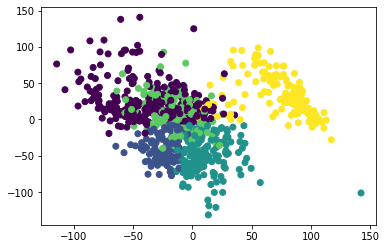

In [29]:
plt.scatter(pca[:,0], pca[:,1], c= agg_clusters)
plt.show()

In [51]:
# Defining the agglomerative clustering
agg_clustert = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5)

# Fit model
agg_clusterst = agg_clustert.fit_predict(tsne_results)
print("The silhoutte score of the Agg Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, agg_clusterst, metric='euclidean')))

The silhoutte score of the Agg Clustering solution: 0.8115875720977783


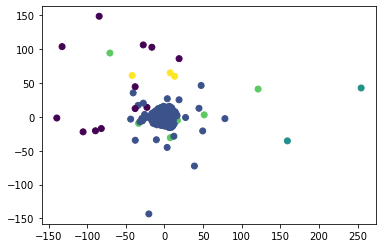

In [61]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c= agg_clusterst)
plt.show()

In [62]:
# Defining the agglomerative clustering
agg_clusteru = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5)

# Fit model
agg_clustersu = agg_clusteru.fit_predict(umap_results)
print("The silhoutte score of the Agg Clustering solution: {}"
      .format(metrics.silhouette_score(umap_results, agg_clustersu, metric='euclidean')))

The silhoutte score of the Agg Clustering solution: 0.8075167536735535


In [70]:
# Defining the agglomerative clustering
agg_clustert = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5)

# Fit model
agg_clusterst = agg_clustert.fit_predict(tsne_results)
print("The silhoutte score of the Agg Clustering solution: {:.2f}"
      .format(metrics.silhouette_score(tsne_results, agg_clusterst, metric='euclidean')))

The silhoutte score of the Agg Clustering solution: 0.81


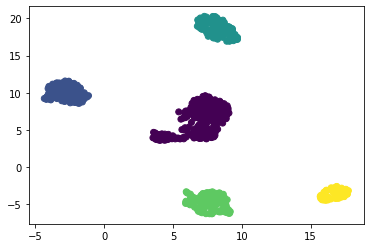

In [63]:
plt.scatter(umap_results[:,0], umap_results[:,1], c= agg_clustersu)
plt.show()

In [84]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=5, min_samples=3)

# Fit model
clusters_db = dbscan_cluster.fit_predict(pca)
print("The silhoutte score of the DBSCAN PCA Clustering solution: {}"
      .format(metrics.silhouette_score(pca, clusters_db, metric='euclidean')))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [82]:
pca.shape

(801, 5)

In [83]:
clusters_db.shape

(801,)

In [85]:
agg_clusterst.shape

(801,)

In [86]:
tsne_results.shape

(801, 3)

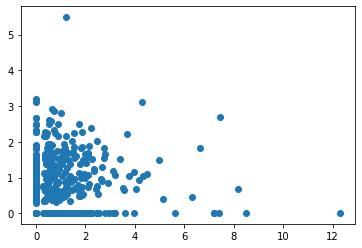

In [93]:
plt.scatter(df2['gene_10'], df2['gene_25'])

In [87]:
df2

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


IndexError: tuple index out of range

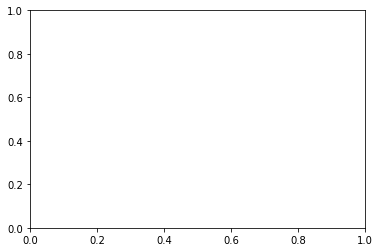

In [106]:
n_components = 2
plt.scatter(pca[:,0], pca[:,1], c = n_components)

In [107]:
dfk = pd.read_csv('fish.csv')

In [109]:
dfk.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [110]:
dfk.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64